In [1]:
from sklearn import datasets as ds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = ds.load_iris()
X, y = iris.data, iris.target
#X = X[y!=2]
#y = y[y!=2]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [5]:
X.shape, y.shape

((150, 4), (150,))

In [6]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
svc_model.score(X_test, y_test)

0.9111111111111111

In [8]:
from sklearn.metrics import classification_report

In [9]:
#classification_report:適合率、再現率、F値
report = classification_report(y_test, svc_model.predict(X_test),
                              target_names=iris.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.71      1.00      0.83        10
   virginica       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.90      0.92      0.90        45
weighted avg       0.94      0.91      0.91        45



### 交差検証

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
#f1,precision,recall:default binary,but X is multiclass
cross_val_score(svc_model, X, y, cv=10, scoring="recall_macro")

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

In [12]:
from sklearn.model_selection import cross_validate

In [13]:
cv = cross_validate(svc_model, X, y, cv=10, scoring="recall_macro")
cv

{'fit_time': array([0.00123405, 0.0014658 , 0.00078392, 0.00186706, 0.00070715,
        0.00069189, 0.0011971 , 0.00080276, 0.00068808, 0.00086308]),
 'score_time': array([0.00265884, 0.00203419, 0.00159407, 0.00094891, 0.00087905,
        0.00137615, 0.00095201, 0.0008719 , 0.00085688, 0.00100303]),
 'test_score': array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
        0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])}

In [14]:
cv["test_score"]

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])

In [15]:
from sklearn.metrics import SCORERS

In [16]:
#score method
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

## 予測確率の正確さ

In [17]:
#method1
#偽陽性と真陽性を算出
fpr = np.array([0,0,1,1,2,3,3,3,3,4,5,5,6,7,8,8,8,9,10,10,11,12,12,13,14]) / 14
tpr = np.array([1,2,2,3,3,3,4,5,6,6,6,7,7,7,7,8,9,9,9,10,10,10,11,11,11]) / 11

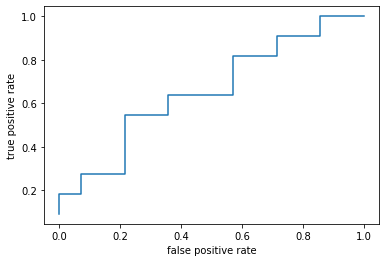

In [18]:
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")

plt.show()

In [19]:
#method2
from sklearn.metrics import roc_curve
labels = np.array([1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0])
score = np.array([0.98,0.95,0.90,0.87,0.85,0.80,0.75,0.71,0.63,0.55,0.51,0.47,0.43,
                  0.38,0.35,0.31,0.28,0.24,0.22,0.19,0.15,0.12,0.08,0.04,0.01])

In [20]:
#偽陽性率、真陽性率、しきい値を算出
fpr02, tpr02, thresholds02 = roc_curve(labels, score)
fpr02, tpr02, thresholds02

(array([0.        , 0.        , 0.        , 0.07142857, 0.07142857,
        0.21428571, 0.21428571, 0.35714286, 0.35714286, 0.57142857,
        0.57142857, 0.71428571, 0.71428571, 0.85714286, 0.85714286,
        1.        ]),
 array([0.        , 0.09090909, 0.18181818, 0.18181818, 0.27272727,
        0.27272727, 0.54545455, 0.54545455, 0.63636364, 0.63636364,
        0.81818182, 0.81818182, 0.90909091, 0.90909091, 1.        ,
        1.        ]),
 array([1.98, 0.98, 0.95, 0.9 , 0.87, 0.8 , 0.63, 0.51, 0.47, 0.35, 0.28,
        0.22, 0.19, 0.12, 0.08, 0.01]))

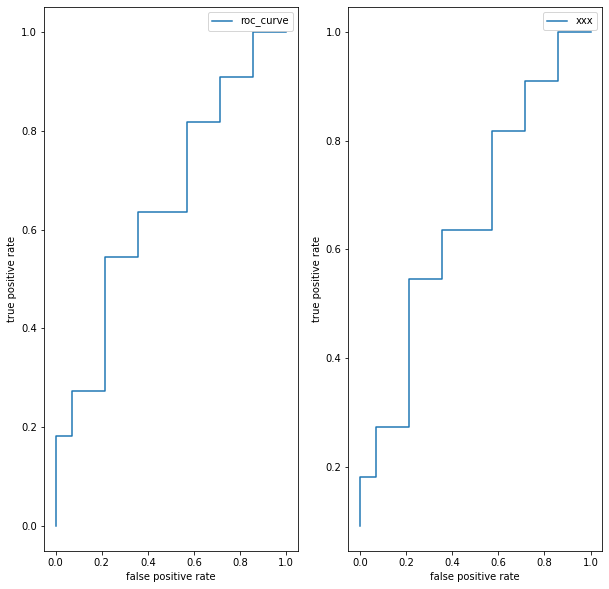

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(10,10))
ax[0].step(fpr02, tpr02, label="roc_curve")
ax[0].set_xlabel("false positive rate")
ax[0].set_ylabel("true positive rate")
ax[0].legend()

ax[1].step(fpr, tpr, label="xxx")
ax[1].set_xlabel("false positive rate")
ax[1].set_ylabel("true positive rate")
ax[1].legend()

plt.show()

### AUC

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
#AUCを算出
roc_auc_score(labels, score)

0.6558441558441558